In [1]:
import os
os.chdir(os.path.dirname(os.path.dirname(os.getcwd())))

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [129]:
power = pd.read_csv('debug_logs/real_power_gurobi_phase_3_step_leap_1_forecast_step_1.csv')
power = power.melt(id_vars=['time_step'], var_name='building', value_name='net_target')
power = power.sort_values(by=['time_step', 'building'])
power['building'] = power['building'].str[-1].astype(int)
power = power[power['time_step'] != -1]
lead_times = [f'+{i}h' for i in range(24)]
# upload min-max scaler from scalers folders with .save extension
power_norm = pd.DataFrame()
for building in range(7):
    power_norm_temp = pd.DataFrame()
    power_norm_temp['time_step'] = power.loc[power['building'] == building, 'time_step']
    power_norm_temp['building'] = building
    power_norm_temp['net_target'] = power.loc[power['building'] == building, 'net_target']
    for i, lead_time in enumerate(lead_times):
        power_norm_temp[lead_time] = power_norm_temp['net_target'].shift(-int(i))
    power_norm = pd.concat([power_norm, power_norm_temp], axis=0)
power_norm = power_norm.dropna()
power_norm = power_norm.sort_values(by=['time_step', 'building'])
# drop the net_target column
power_norm = power_norm.drop(columns=['net_target'])
# set the index to time_step and building
power_norm = power_norm.set_index(['time_step', 'building'])
power_norm

+0h           +1h           +2h           +3h  \
time_step building                                                           
0         0         6.907833e-01  6.887500e-01  6.335667e-01  6.768111e-01   
          1         1.000000e-07  1.000000e-07  1.000000e-07  1.000000e-07   
          2         1.405750e+00  1.187467e+00  1.100133e+00  1.247567e+00   
          3         3.328667e-01  7.353000e-01  2.221967e+00  8.956500e-01   
          4         1.000000e-07  1.000000e-07  1.000000e-07  1.000000e-07   
...                          ...           ...           ...           ...   
8735      2         6.969639e-01  3.210000e-01  3.210944e-01  3.088667e-01   
          3         4.002333e-01  3.982500e-01  3.777389e-01  6.308833e-01   
          4         1.000000e-07  1.000000e-07  1.000000e-07  1.000000e-07   
          5         1.114000e+00  1.494167e+00  1.409217e+00  1.421167e+00   
          6         1.227383e+00  1.466233e+00  3.340667e-01  3.619333e-01   

                             +4h           +5h       +6h       +7h       +8h  \
time_step building                                                             
0         0         6.204500e-01  1.463322e+00  1.589600  0.230944  0.224400   
          1         1.000000e-07 -4.568323e-02  0.074033  0.331600  0.985483   
          2         7.937833e-01  9.422500e-01  1.120967  1.330017  0.269967   
          3         3.305833e-01  4.994500e-01  3.203350 -0.007133 -0.404317   
          4         1.000000e-07  1.000000e-07  0.069367  0.495367  1.215700   
...                          ...           ...       ...       ...       ...   
8735      2         3.979000e-01  4.443667e-01  0.261883  0.903417 -0.208967   
          3         2.034978e+00  4.323000e-01  0.202372 -0.081250 -0.404711   
          4         1.000000e-07  1.000000e-07 -0.080200  0.353133  1.000117   
          5         1.377900e+00  1.404483e+00  1.528767  1.095467  0.279600   
          6         3.675000e-01  1.177217e+00  1.352033 -0.945517 -1.489833   

                         +9h  ...      +14h      +15h      +16h      +17h  \
time_step building            ...                                           
0         0        -0.346778  ... -0.517433 -0.148833  0.445283  1.518111   
          1         1.902900  ... -0.023517 -0.355717 -0.244867 -0.174317   
          2         0.224567  ...  0.305383 -0.234767  0.502983  0.846617   
          3        -0.658783  ... -0.111100 -0.087400 -0.441150  0.256567   
          4         1.586317  ...  0.246533  0.060083  0.088150  0.002800   
...                      ...  ...       ...       ...       ...       ...   
8735      2         0.269117  ... -1.717206  0.196217  1.476428  2.158550   
          3        -0.662000  ...  1.747511  1.755267  2.693389  3.650067   
          4         1.832300  ...  3.023450  2.676717  2.130667  1.408808   
          5         0.487600  ... -1.725900  0.125133  0.400967 -0.025800   
          6        -2.205650  ...  0.941767 -1.639083  1.222650  2.820967   

                            +18h          +19h          +20h          +21h  \
time_step building                                                           
0         0         2.988317e+00  3.048861e+00  3.568817e+00  2.022833e+00   
          1        -1.911658e-02  1.000000e-07  1.000000e-07  1.000000e-07   
          2         2.221517e+00  1.808833e+00  2.170200e+00  1.665800e+00   
          3         2.051300e+00  4.820833e-01  8.071167e-01  4.758667e-01   
          4         1.000000e-07  1.000000e-07  1.000000e-07  1.000000e-07   
...                          ...           ...           ...           ...   
8735      2         1.526644e+00  3.313683e+00  1.880772e+00  3.529250e+00   
          3         3.671528e+00  2.727883e+00  1.323300e+00  1.507017e+00   
          4         5.775250e-01 -3.678333e-02  1.000000e-07  1.000000e-07   
          5         3.426450e+00  1.699617e+00  1.798450e+00  1.804633e+00   
          6         3.207700e+00  3

In [130]:
daily = pd.read_csv('debug_logs/scen_daily_persistence_phase_3_step_leap_1_forecast_step_1.csv')
weekly_means = pd.read_csv('debug_logs/scen_weekly_means_phase_3_step_leap_1_forecast_step_1.csv')
forec_point = pd.read_csv('debug_logs/scen_gurobi_phase_3_step_leap_1_forecast_step_1.csv')

In [131]:
MAC = {}
algo_names = ['daily', 'weekly_means', 'forec_point']
algo_list = [daily, weekly_means, forec_point]
# caculate horizontal stability as of mean paiwise absolute difference between columns of daily and weekly_means
for j, algo in enumerate(algo_names):
    log = algo_list[j].iloc[:, 3:]
    MAC_list = [0] * 24
    for i, col in enumerate(log.columns[:-1]):
        MAC_list[i] = np.mean(np.abs(log.iloc[:,i] - log.iloc[:,i+1]))
    MAC[algo] = np.mean(MAC_list).round(3)

In [132]:
MAC

{'daily': 0.493, 'weekly_means': 0.321, 'forec_point': 0.269}

In [123]:
MAE = {}
algo_names = ['daily', 'weekly_means', 'forec_point']
algo_list = [daily, weekly_means, forec_point]
# caculate accuracy of each algorithm compared to power_norm
for j, algo in enumerate(algo_names):
    log = algo_list[j].set_index(['time_step', 'building']).drop(columns=['scenario'])
    num_buildings = log.index.get_level_values('building').nunique()
    log = log.loc[power_norm.index, :]
    MAE_list = [0] * num_buildings
    for b_num in range(num_buildings):
        log_temp = log.loc[log.index.get_level_values('building') == b_num, :]
        power_norm_temp = power_norm.loc[(slice(None), b_num), :]
        MAE_list[b_num] = np.abs(log_temp - power_norm_temp).mean(axis=1).mean()
    MAE[algo] = np.mean(MAE_list).round(3)

In [124]:
MAE

{'daily': 0.62, 'weekly_means': 0.562, 'forec_point': 0.578}

In [67]:
daily_temp = daily.set_index(['time_step', 'building']).drop(columns=['scenario']).loc[power_norm.index, :]
daily_temp = daily_temp.loc[power_norm.index.get_level_values('building') == 6]
daily_temp

,,+0h,+1h,+2h,+3h,+4h,+5h,+6h,+7h,+8h,+9h,...,+14h,+15h,+16h,+17h,+18h,+19h,+20h,+21h,+22h,+23h
time_step,building,,,,,,,,,,,,,,,,,,,,,
0,6,0.875852,0.792368,0.755123,0.733063,0.738041,0.751972,0.618480,0.072340,-0.449581,-0.886109,...,-0.690181,0.267207,0.680208,1.214298,1.450288,1.341062,1.368201,1.355388,1.303982,1.117669
1,6,0.782202,0.752656,0.722748,0.718912,0.703490,0.485460,-0.013731,-0.469788,-0.938602,-1.199758,...,0.047996,0.606123,1.115386,1.430253,1.299163,1.263886,1.234849,1.228614,1.129778,0.929295
2,6,0.836032,0.787673,0.808017,0.768136,0.537407,-0.019594,-0.524936,-0.969113,-1.355992,-1.411493,...,0.602611,1.089923,1.428374,1.328453,1.278552,1.241599,1.216253,1.138595,0.961855,0.769302
3,6,0.799283,0.811794,0.743706,0.517057,-0.027425,-0.492338,-0.992508,-1.289946,-1.418761,-1.445477,...,1.113304,1.430881,1.327953,1.285762,1.270323,1.225996,1.123287,0.972887,0.808806,0.749623
4,6,0.920829,0.849425,0.572557,0.015208,-0.501440,-0.925445,-1.296562,-1.469250,-1.506704,-1.270911,...,1.419963,1.329259,1.321254,1.257167,1.234457,1.136024,0.970471,0.828593,0.808577,0.765012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,6,2.409700,3.004367,2.659983,2.162700,1.219483,1.284833,1.282517,1.315600,0.371167,0.719383,...,-2.453667,2.691500,-0.137983,0.037550,5.427183,2.008267,1.401783,5.955367,4.584283,5.886283
8732,6,3.004367,2.659983,2.162700,1.219483,1.284833,1.282517,1.315600,0.371167,0.719383,1.015667,...,2.691500,-0.137983,0.037550,5.427183,2.008267,1.401783,5.955367,4.584283,5.886283,5.549800
8733,6,2.659983,2.162700,1.219483,1.284833,1.282517,1.315600,0.371167,0.719383,1.015667,-0.690733,...,-0.137983,0.037550,5.427183,2.008267,1.401783,5.955367,4.584283,5.886283,5.549800,6.059400


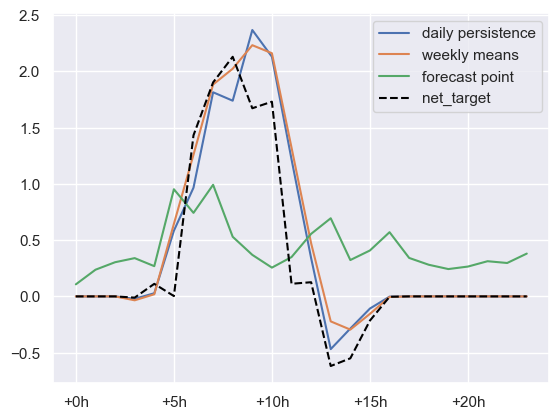

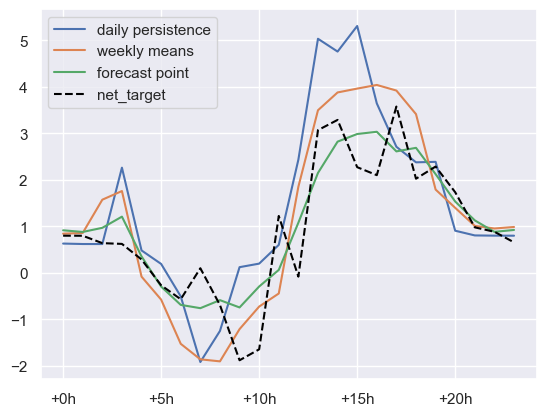

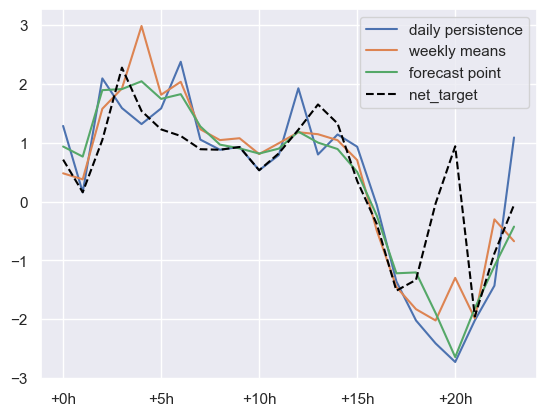

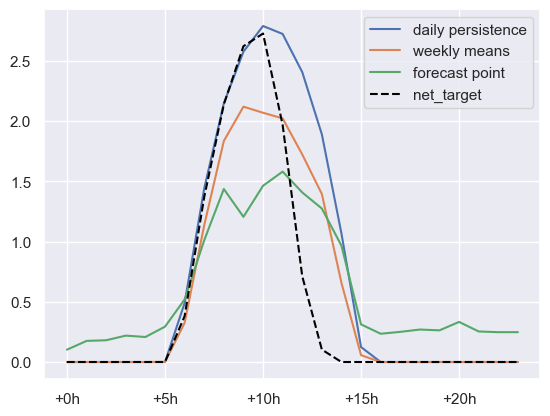

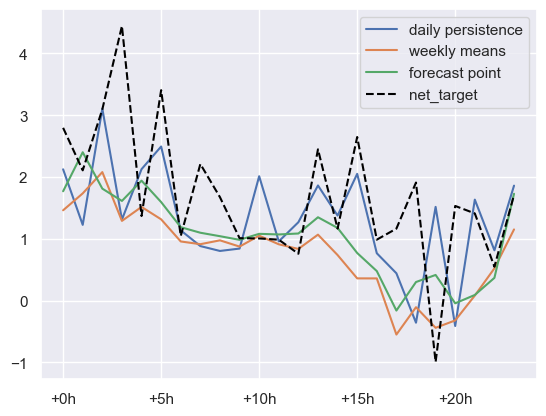

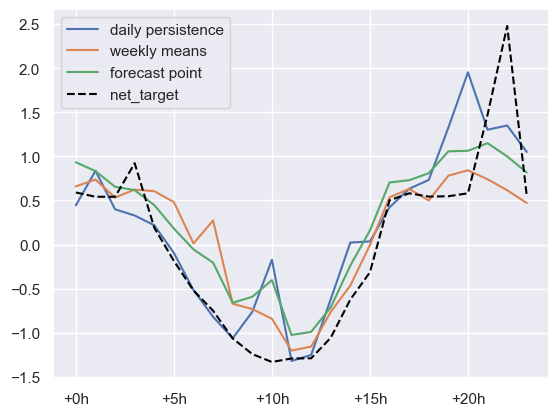

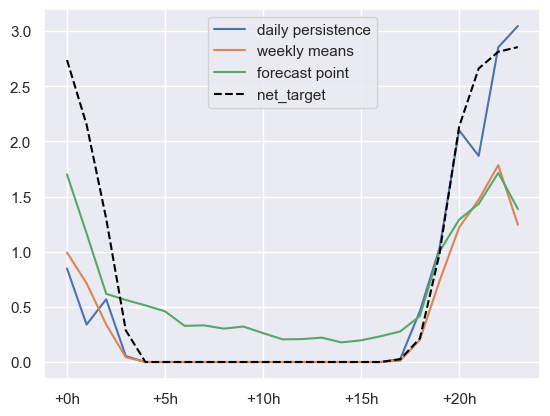

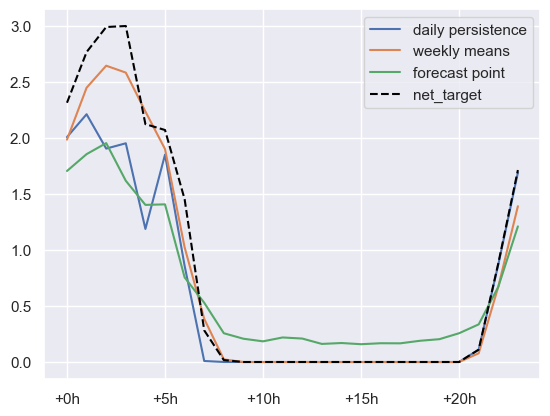

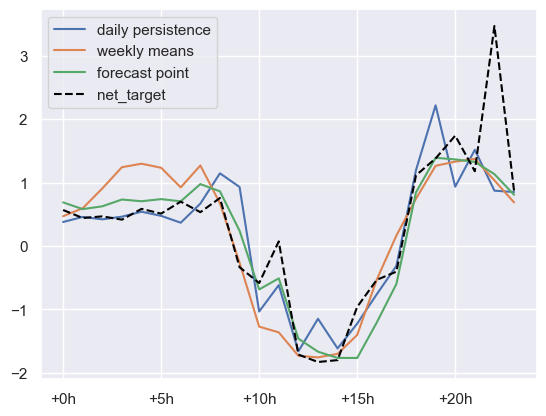

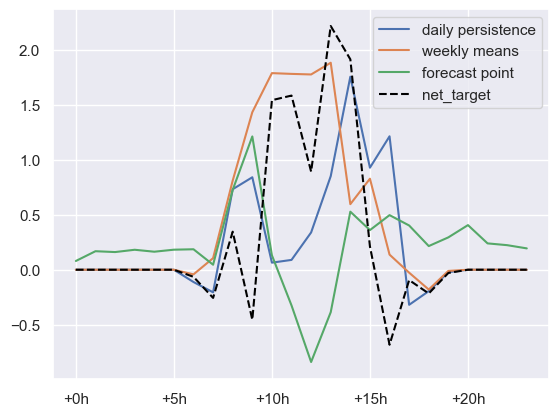

In [100]:
# pick random 5 numbers from 0 to len(power_norm_temp)
x_list = np.random.randint(0, len(power_norm), 10)
# seaborn style
sns.set_theme(style="darkgrid")
for x in x_list:
    daily.iloc[x, 3:].plot(label='daily persistence')
    weekly_means.iloc[x, 3:].plot(label='weekly means')
    forec_point.iloc[x, 3:].plot(label='forecast point')
    power_norm.iloc[x, :].plot(label='net_target', color='black', linestyle='--')
    plt.legend()
    plt.show()